In [5]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [6]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge, optimal_stopping_Normal
from Checking_simulated_boundary_functions_2 import simulate_brownian_bridge, simulate_process, value_function_first_step, v_expectance, optimal_stopping_montecarlo

# Exact optimal stopping boundary for a Dirac Delta distribution

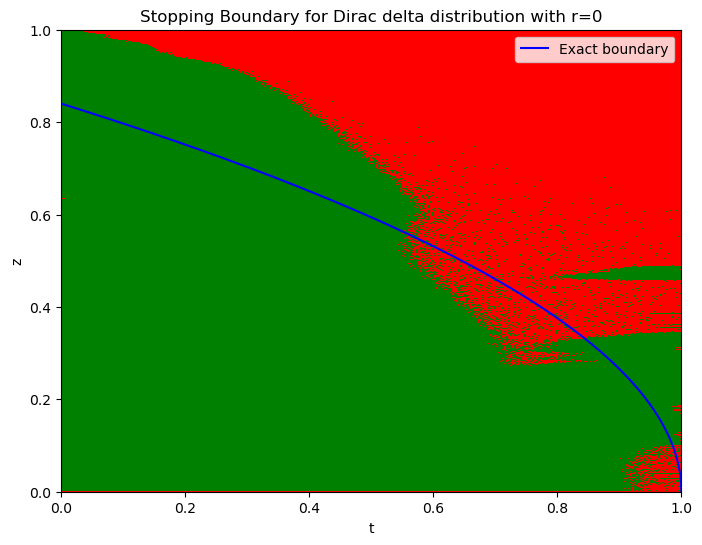

In [7]:
# Pinning point
r = 0
dirac_delta_distribution = rv_discrete(name = 'Delta Dirac', values = (np.array([r]), np.array([1])))

# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)
L = 1000
np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo(mu = dirac_delta_distribution, N = mesh, M = 1000 , L = L, m = 0, gamma = 0)

# Plotting
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

else:
    # Adjust meshgrid
    T, X = np.meshgrid(t_mesh, X_vals)
    
    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1)) # Boolean matrix
    colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
    plt.legend()
    plt.xlim(0, 1)
    plt.ylim(np.min(X_vals), np.max(X_vals))
    plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

0 1.0
100 5.1510349919503136e-05
200 6.944029380320232e-06
300 1.7147304646982898e-06


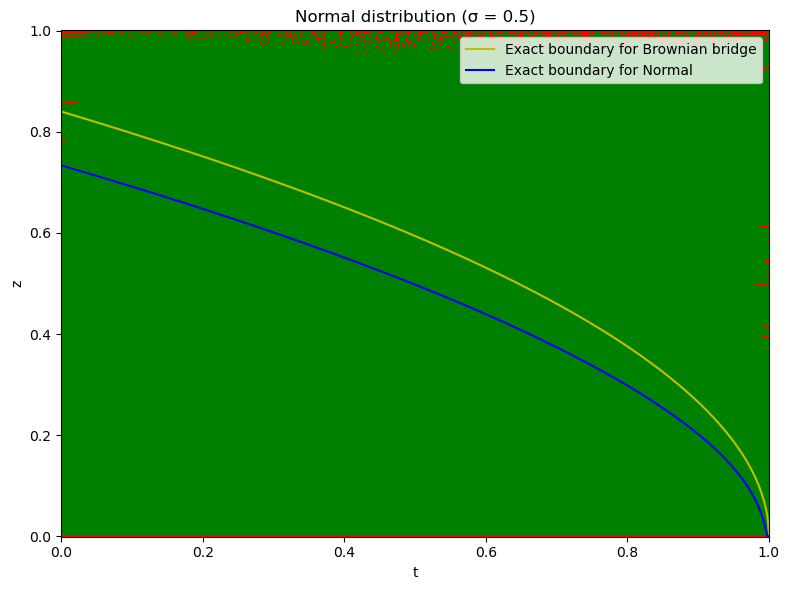

In [8]:
# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh) # Temporal grid

# Exact BB
r = 0
exact_boundary_BB = optimal_stopping_Brownian_bridge(t_mesh, r)

# Normal distributions
sd = 1/2

class Normal(rv_continuous):
    def __init__(self, mean=0, sigma=1, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._mean = mean
        self._sigma = sigma

    def _pdf(self, x):
        return (1 / (self._sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - self._mean) / self._sigma) ** 2)

    def _rvs(self, size=None, random_state=None):
        if random_state is None:
            random_state = np.random.default_rng()
        return random_state.normal(loc=self._mean, scale=self._sigma, size=size)

    def mean(self):
        return self._mean

    def std(self):
        return self._sigma       
        
mean = r
sigma = sd
L = 1000 # Spatial grid
np.random.seed(123)
normal_distribution = Normal(mean=mean, sigma=sigma, name="normal", a=-np.inf, b=np.inf)

np.random.seed(123)
value_function, X_vals = optimal_stopping_montecarlo(mu=normal_distribution, N=mesh, M=1000, L=L, m=mean, gamma=sd)
exact_boundary_Normal = optimal_stopping_Normal(mesh = t_mesh, m = mean, gamma = sd, tol = 1e-6)


# Plotting
if mesh != L:
    # Adjust meshgrid for different dimensions
    T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L)) 
    
    # Interpole value_function to adjust `t_mesh`
    interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
    value_function_interp = interp_func(t_mesh)  # Ahora tiene forma (mesh, L) = (10,100)
    
    # Adjust X_vals to match value_function_interp
    X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)
    comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))
    
    # Define colors
    cmap = mcolors.ListedColormap(['green', 'red'])

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution {i+1} (σ = {sd})")
    plt.legend()
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

else: 
    # Adjust meshgrid 
    T, X = np.meshgrid(t_mesh, X_vals)

    # Define colors and mapping
    comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1))
    colors = np.where(comparison, 1, 0)
    cmap = plt.cm.colors.ListedColormap(['green', 'red'])
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.plot(t_mesh, exact_boundary_BB, 'y-', label="Exact boundary for Brownian bridge")
    plt.plot(t_mesh, exact_boundary_Normal, 'b-', label="Exact boundary for Normal")
    plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
    plt.xlabel("t")
    plt.ylabel("z")
    plt.title(f"Normal distribution (σ = {sd})")
    plt.legend()
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()